# FINAL ASSIGNMENT

# Task 1: Become familiar with the dataset
## The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



# Task 2: Create or Login into IBM cloud to use Watson Studio.

# Task 3: Load in the Dataset in your Jupyter Notebook

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [10]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col = 0)

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [12]:
boston_df.shape

(506, 13)

In [13]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [14]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


# Task 4: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

## Generate the following and explain your findings:

<li>For the "Median value of owner-occupied homes" provide a boxplot</li>

<li>Provide a  bar plot for the Charles river variable</li>

<li>Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)</li>

<li>Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?</li>

<li>Create a histogram for the pupil to teacher ratio variable</li>

In [34]:
boston_df["AGE"].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [37]:
boston_df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

<AxesSubplot:title={'center':'Median value of owner-occupied homes'}, ylabel='MEDV'>

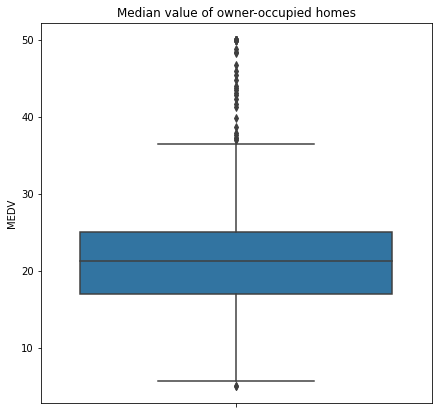

In [35]:
plt.figure(figsize = (7,7)) 
plt.title("Median value of owner-occupied homes")
sns.boxplot(y = boston_df["MEDV"])


<li>1st quartile         = 17.025</li>

<li> median(2nd quartile) = 21.200</li>

<li>3rd quartile         = 25.000</li>

The values after 35 are the outliers 

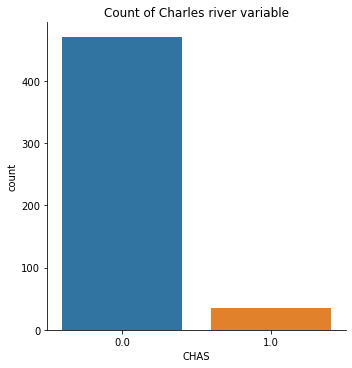

In [90]:
ax = sns.catplot(x = "CHAS", kind ="count", data = boston_df)
ax.set(xlabel='CHAS', ylabel='count', title = "Count of Charles river variable")

The chart shows that more people live far from Charles river. Less than 100 people resides near Charles river.

In [110]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df["AGE"] <= 35), "AGE_GROUP"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "AGE_GROUP"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "AGE_GROUP"] = "70 years and older"

<AxesSubplot:title={'center':'MEDV variable vs the AGE variable'}, xlabel='MEDV', ylabel='AGE_GROUP'>

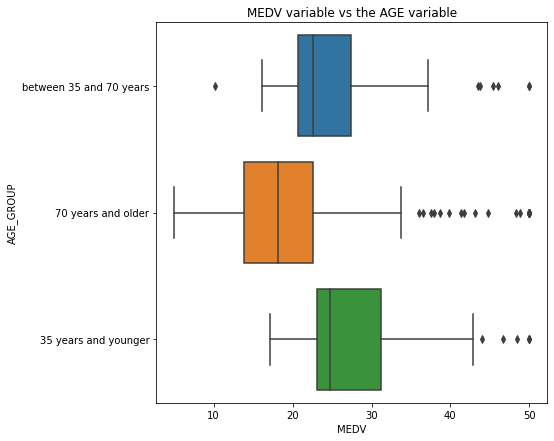

In [111]:
#Provide a boxplot for the MEDV variable vs the AGE variable
plt.figure(figsize=(7,7))
plt.title("MEDV variable vs the AGE variable")
sns.boxplot(x= "MEDV", y= "AGE_GROUP", data = boston_df)

The boxplot above shows that on average the median value of owner occupied homes is higher when the Age is lower

[Text(0.5, 0, 'Nitric Oxide Concentration'),
 Text(0, 0.5, 'Non-Retail Business Acres per Town'),
 Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')]

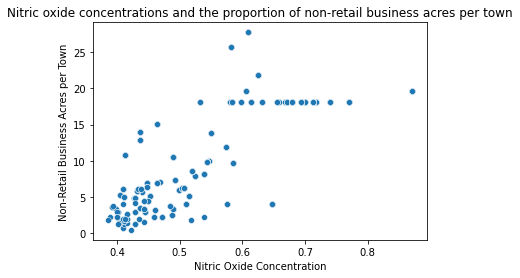

In [99]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
ax.set(xlabel='Nitric Oxide Concentration', ylabel='Non-Retail Business Acres per Town', title='Nitric oxide concentrations and the proportion of non-retail business acres per town')

The NOX is positively correlated to INDUS. The graph show the increase in Nitric Oxide concentration as there is increase in non-retail business, but once the non retail business is greater than 15 the Nitric Oxide concentration become constant.  

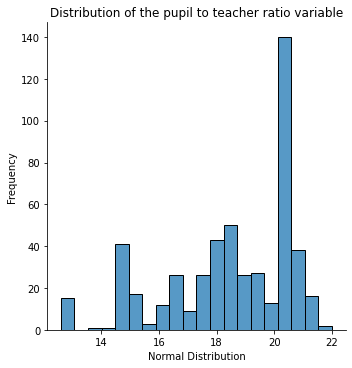

In [109]:
# Create a histogram for the pupil to teacher ratio variable
ax = sns.displot(x = boston_df["PTRATIO"], bins = 20, kde = False)
ax.set(xlabel='Normal Distribution', ylabel='Frequency', title = "Distribution of the pupil to teacher ratio variable")

The graph shows the distribution is left skewed distribution.

# Task 5: Use the appropriate tests to answer the questions provided.
## For each of the following questions;

<li>Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)</li>

<li>Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</li>

<li>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)</li>

<li>What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</li>

###  1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

*   One independent, categorical variable with two levels or group
*   One dependent continuous variable
*   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
*   The dependent variable must follow a normal distribution
*   Assumption of homogeneity of variance


#### State the Hypothesis 
H_0 :  µ\_1 = µ\_2 (There is no significant difference in median values of houses bounded by the Charles river)

H_1:   µ\_1 ≠ µ\_2 (There is significant difference in median values of houses bounded by the Charles river)

#### NOTE:
Assumption 1: One independent, categorical variable with two levels or group, the independent variable is CHAS, but it is numerical variable. So, we need to convert it to categorical variables

In [92]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of dependent variable (MEDV)')]

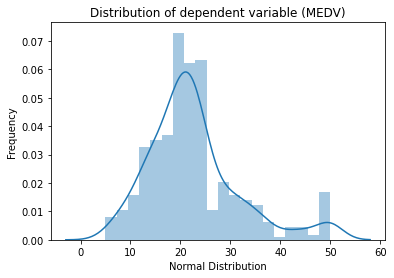

In [75]:
# We can plot the dependent variable with a historgram
ax = sns.distplot(x = boston_df["MEDV"], bins = 20, kde = True)
ax.set(xlabel='Normal Distribution', ylabel='Frequency', title='Distribution of dependent variable (MEDV)')

### Levene's test

#### State the Hypothesis:
H_0: Equality of variance

H_1: Atleast one variance is not equal

In [103]:
scipy.stats.levene(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                   boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], center = "mean")

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

#### Note:
The p value is less than alpha i.e. 0.05>0.03. So, we reject the null hypothesis i.e. Inequality of variance

In [105]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                   boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

#### Result: 
 Since the value of p is less than alpha which is 0.05.
So, we reject the null hypothesis, i.e. There is enough statistical proof that there is statiscal differnce in median values by Charlres river.

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### State the Hypothesis: 
H_0: µ_1=µ_2=µ_3  (the three population means are equal) i.e. There is no significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

H_1:  At least one of the means differ. i.e. There is significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

In [101]:
boston_df.loc[(boston_df["AGE"] <= 35), "AGE_GROUP"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "AGE_GROUP"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "AGE_GROUP"] = "70 years and older"

### Levene's test

#### State the Hypothesis:
H_0: Equality of variance

H_1: Atleast one variance is not equal

In [95]:
# Test for equality of variance
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

#### Note: 
The p value is greater than alpha i.e. 0.06>0.05.
So, we fail to reject the null hypothesis i.e. Eqaulity of variance

In [96]:
thirtyfive_lower   = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older      = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [97]:
# One way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Result: 
The p-value is less than alpha (0.05)
So, we need to reject the null hypothesis. i.e. There is significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### State the Hypothesis:
H_0: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H_1: There is significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


#### Note:
Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot.

[Text(0.5, 0, 'Nitric Oxide Concentration'),
 Text(0, 0.5, 'Non-Retail Business Acres per Town'),
 Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')]

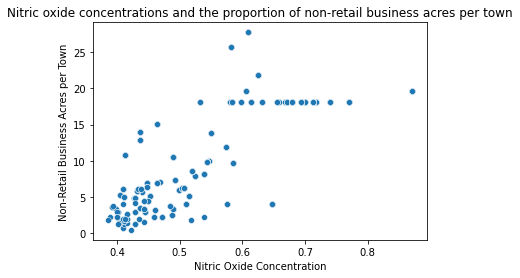

In [98]:
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
ax.set(xlabel='Nitric Oxide Concentration', ylabel='Non-Retail Business Acres per Town', title='Nitric oxide concentrations and the proportion of non-retail business acres per town')

In [100]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

#### Result: 
Since the p-value is less than alpha(0.05).
We need to reject the null hypothesis. i.e. There is significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### Note:
No, we can't conclude there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### State the Hypothesis:
H_0: Weighted distance to the five Boston employment centres on the median value of owner occupied homes are not correlated.

H_1: Weighted distance to the five Boston employment centres on the median value of owner occupied homes are correlated.

In [108]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        10:49:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Result:
Since the p-value is less than alpha(0.05), we reject the null hypothesis. i.e. Weighted distance to the five Boston employment centres on the median value of owner occupied homes are correlated.


#### Note:
The coefficient 1.0916 means that for MEDV increases by 1.0916 times for every 1 weighted distances to five Boston employment centres